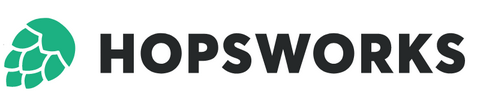

# Part 02: Load, Engineer & Connect

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/logicalclocks/hopsworks-tutorials/blob/master/advanced_tutorials/on_demand_feature/notebooks/2_feature_pipeline.ipynb)

In [ ]:
!pip install -U hopsworks --quiet
!pip install -U 'git+https://github.com/logicalclocks/hopsworks-tutorials@master#egg=on_demand_feature&subdirectory=advanced_tutorials/on_demand_feature/on_demand_feature'

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from features import coord_to_postcode

## <span style="color:#ff5f27;"> 💽 Loading the Data </span>

In [ ]:
df = pd.read_csv("https://repo.hops.works/dev/davit/on_demand_ft/housing.csv")

In [ ]:
# for simplicity and performance sample 10 datapoits   
df = df.sample(10)

In [ ]:
# apply on demand feature function to deduce zipcode before we ingest to feature group
zipcode = df.copy()
zipcode["zipcode"] = df.apply(lambda x : coord_to_postcode.coord2zipcode(x), axis = 1)
zipcode = zipcode[["houseid", "zipcode"]]
# drop longitude and latitude
df.drop(["longitude", "latitude"], axis=1, inplace=True)

## <span style="color:#ff5f27;"> 🪄 Update Feature Groups with the latest data </span>

In [ ]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

In [ ]:
housing_fg = fs.get_feature_group(
    name="house_arch",
    version=1)
housing_fg.insert(df)

In [ ]:
zipcode_fg = fs.get_feature_group(
    name="zipcodes",
    version=1)
zipcode_fg.insert(zipcode)